In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("data/cox-violent-parsed.csv")
df

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
2,3.0,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,...,Risk of Violence,2,Low,31/12/2014,30/12/2014,03/01/2015,0,3,457,0
3,4.0,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,...,Risk of Violence,1,Low,27/01/2013,26/01/2013,05/02/2013,0,9,159,1
4,5.0,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,...,Risk of Violence,3,Low,14/04/2013,16/06/2013,16/06/2013,4,0,63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18311,NaN,alexsandra beauchamps,alexsandra,beauchamps,29/12/2014,Female,21/12/1984,31,25 - 45,African-American,...,Risk of Violence,4,Low,29/12/2014,28/12/2014,07/01/2015,5,9,459,0
18312,NaN,winston gregory,winston,gregory,14/01/2014,Male,01/10/1958,57,Greater than 45,Other,...,Risk of Violence,1,Low,14/01/2014,13/01/2014,14/01/2014,0,0,808,0
18313,NaN,farrah jean,farrah,jean,09/03/2014,Female,17/11/1982,33,25 - 45,African-American,...,Risk of Violence,2,Low,09/03/2014,08/03/2014,09/03/2014,3,0,754,0
18314,NaN,florencia sanmartin,florencia,sanmartin,30/06/2014,Female,18/12/1992,23,Less than 25,Hispanic,...,Risk of Violence,4,Low,30/06/2014,15/03/2015,15/03/2015,2,0,258,0


In [3]:
df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event'],
      dtype='object')

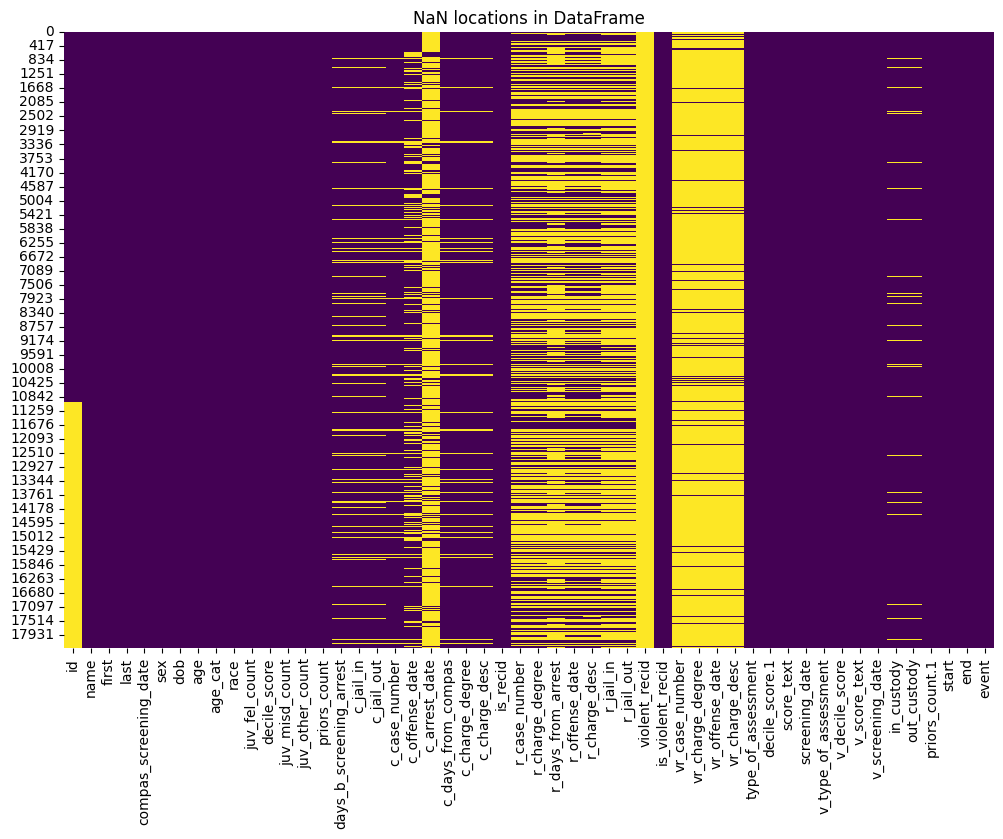

In [4]:
# Plot heatmap of NaNs
plt.figure(figsize=(12,8))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("NaN locations in DataFrame")
plt.show()

In [5]:
df = df.drop(columns=["id", "name", "first", "last", "compas_screening_date", "dob", "age_cat", "days_b_screening_arrest", "c_jail_in", "c_jail_out", "c_case_number", "c_offense_date", "c_arrest_date", "c_days_from_compas", "r_case_number", "c_charge_desc", "r_case_number", "r_charge_degree", "r_days_from_arrest", "r_offense_date", "r_charge_desc", "r_jail_in", "r_jail_out", "violent_recid", "vr_case_number", "vr_charge_degree", "vr_offense_date", "vr_charge_desc", "type_of_assessment", "score_text", "screening_date", "v_type_of_assessment", "v_score_text", "v_screening_date", "in_custody", "out_custody"])
df

,sex,age,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_charge_degree,is_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event
0,Male,69,Other,0,1,0,0,0,(F3),0,0,1,1,0,0,327,0
1,Male,69,Other,0,1,0,0,0,(F3),0,0,1,1,0,334,961,0
2,Male,31,Caucasian,0,5,0,0,0,NaN,-1,0,5,2,0,3,457,0
3,Male,34,African-American,0,3,0,0,0,(F3),1,1,3,1,0,9,159,1
4,Male,24,African-American,0,4,0,1,4,(F3),1,0,4,3,4,0,63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18311,Female,31,African-American,0,6,0,0,5,(M1),0,0,6,4,5,9,459,0
18312,Male,57,Other,0,1,0,0,0,(F2),0,0,1,1,0,0,808,0
18313,Female,33,African-American,0,2,0,0,3,(M1),0,0,2,2,3,0,754,0
18314,Female,23,Hispanic,0,4,0,0,2,(F3),1,0,4,4,2,0,258,0


In [6]:
df = df.dropna(inplace=False).reset_index(drop=True)
df

,sex,age,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_charge_degree,is_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event
0,Male,69,Other,0,1,0,0,0,(F3),0,0,1,1,0,0,327,0
1,Male,69,Other,0,1,0,0,0,(F3),0,0,1,1,0,334,961,0
2,Male,34,African-American,0,3,0,0,0,(F3),1,1,3,1,0,9,159,1
3,Male,24,African-American,0,4,0,1,4,(F3),1,0,4,3,4,0,63,0
4,Male,24,African-American,0,4,0,1,4,(F3),1,0,4,3,4,63,107,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17444,Female,31,African-American,0,6,0,0,5,(M1),0,0,6,4,5,9,459,0
17445,Male,57,Other,0,1,0,0,0,(F2),0,0,1,1,0,0,808,0
17446,Female,33,African-American,0,2,0,0,3,(M1),0,0,2,2,3,0,754,0
17447,Female,23,Hispanic,0,4,0,0,2,(F3),1,0,4,4,2,0,258,0


In [7]:
df.isna().sum()

sex                 0
age                 0
race                0
juv_fel_count       0
decile_score        0
juv_misd_count      0
juv_other_count     0
priors_count        0
c_charge_degree     0
is_recid            0
is_violent_recid    0
decile_score.1      0
v_decile_score      0
priors_count.1      0
start               0
end                 0
event               0
dtype: int64

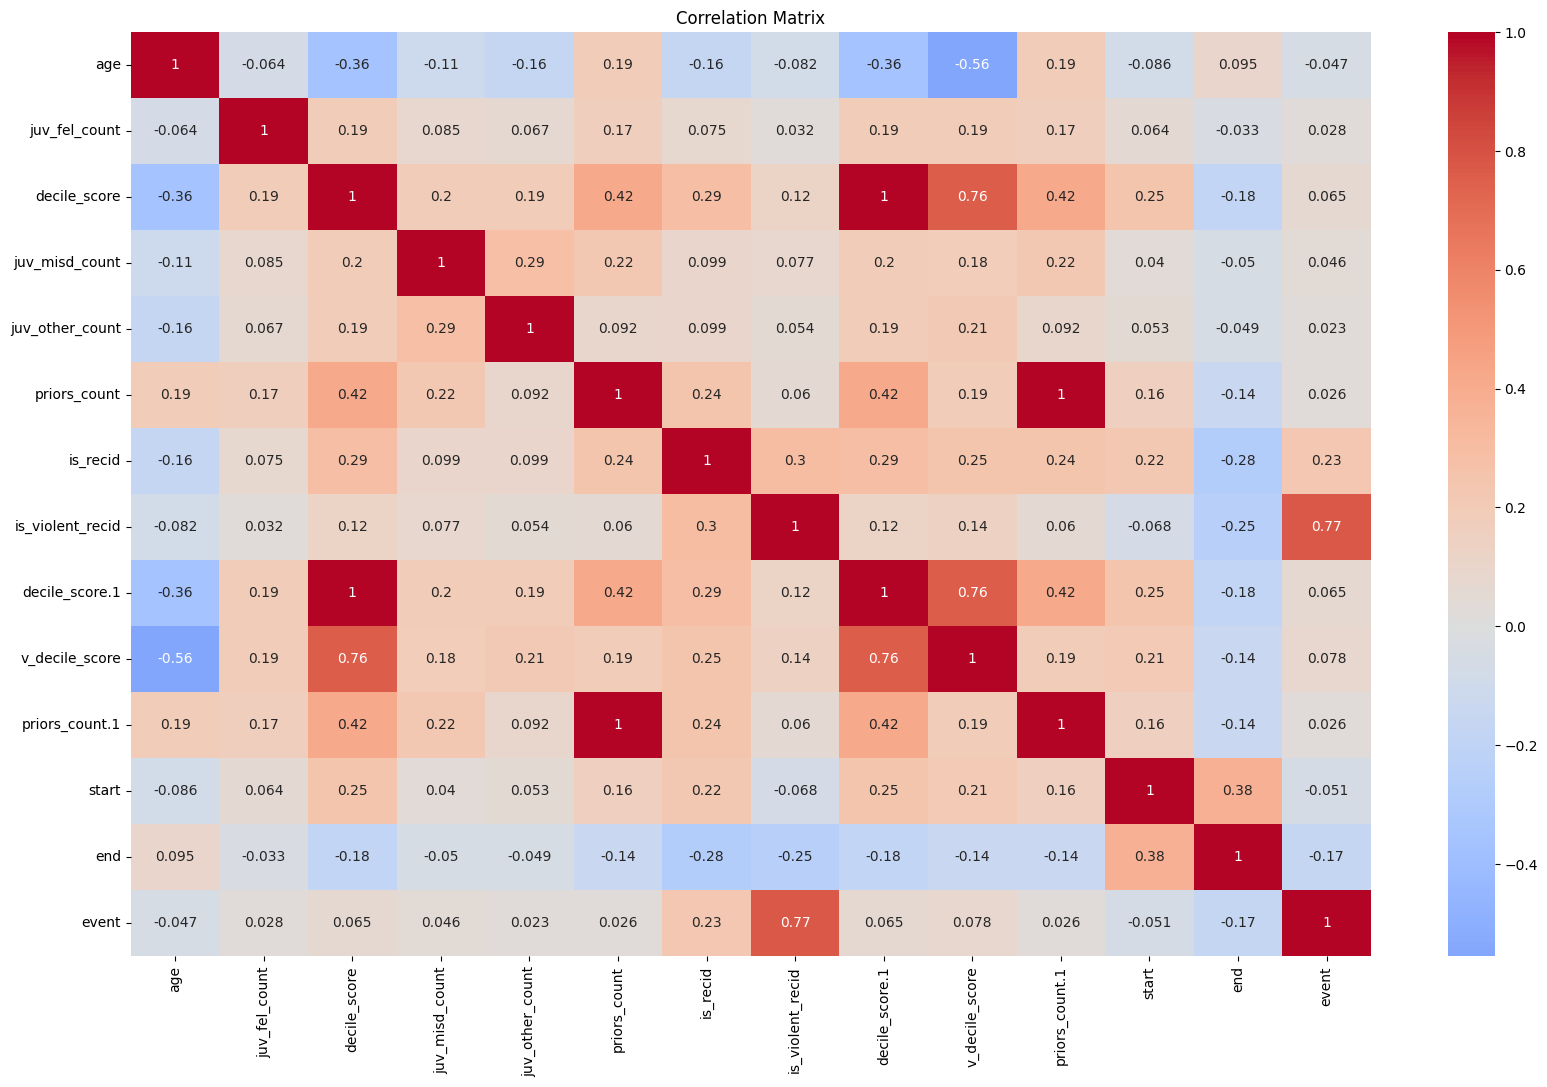

In [8]:
# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [9]:
df_encoded = pd.get_dummies(df, dtype=int)
df_encoded

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,is_recid,is_violent_recid,decile_score.1,v_decile_score,...,c_charge_degree_(F3),c_charge_degree_(F5),c_charge_degree_(F6),c_charge_degree_(F7),c_charge_degree_(M1),c_charge_degree_(M2),c_charge_degree_(MO3),c_charge_degree_(NI0),c_charge_degree_(TCX),c_charge_degree_(X)
0,69,0,1,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
1,69,0,1,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
2,34,0,3,0,0,0,1,1,3,1,...,1,0,0,0,0,0,0,0,0,0
3,24,0,4,0,1,4,1,0,4,3,...,1,0,0,0,0,0,0,0,0,0
4,24,0,4,0,1,4,1,0,4,3,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17444,31,0,6,0,0,5,0,0,6,4,...,0,0,0,0,1,0,0,0,0,0
17445,57,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
17446,33,0,2,0,0,3,0,0,2,2,...,0,0,0,0,1,0,0,0,0,0
17447,23,0,4,0,0,2,1,0,4,4,...,1,0,0,0,0,0,0,0,0,0


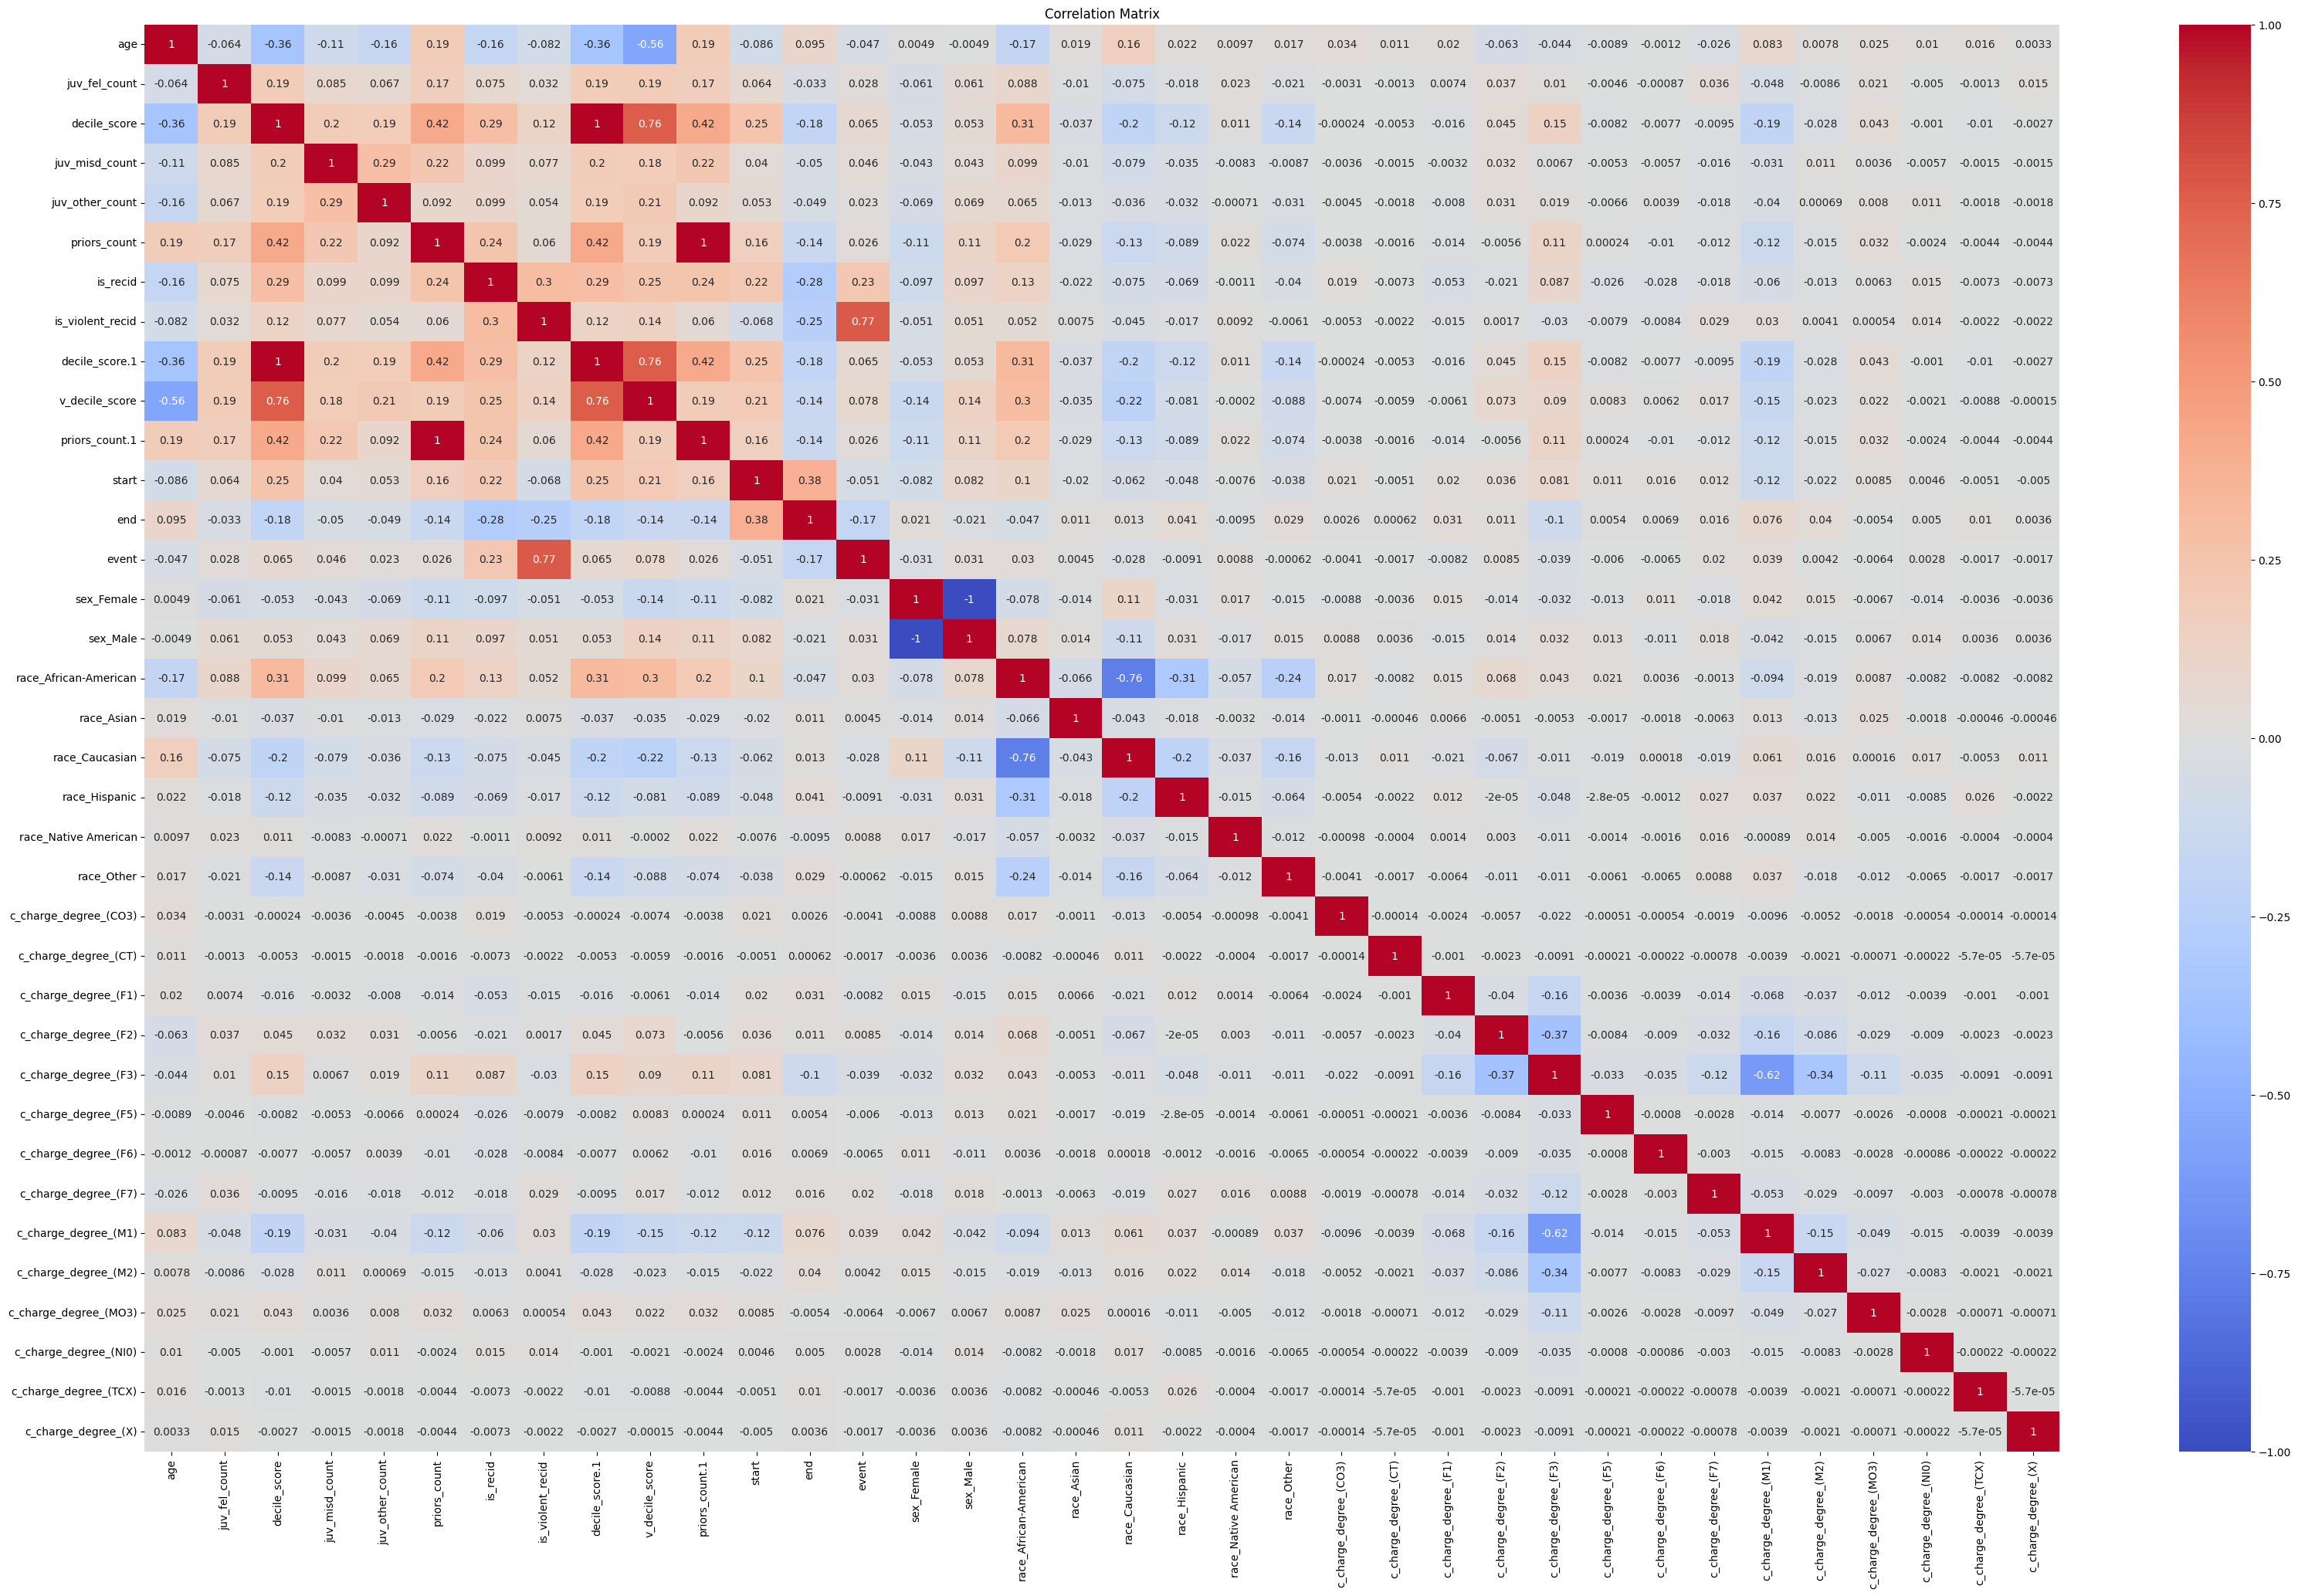

In [10]:
# Compute correlation matrix
corr_encoded = df_encoded.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(40, 24))
sns.heatmap(corr_encoded, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [11]:
X = df_encoded.drop(columns=["decile_score", "is_recid", "is_violent_recid", "decile_score.1", "v_decile_score"])
y = df_encoded["is_recid"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Create a logistic regression model instance
model = LogisticRegression(solver='liblinear', random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

/Users/gustavogonzalez/miniconda3/envs/ril/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [14]:
y_pred = model.predict(X_test)

Confusion Matrix:
[[1354  442]
 [ 446 1248]]


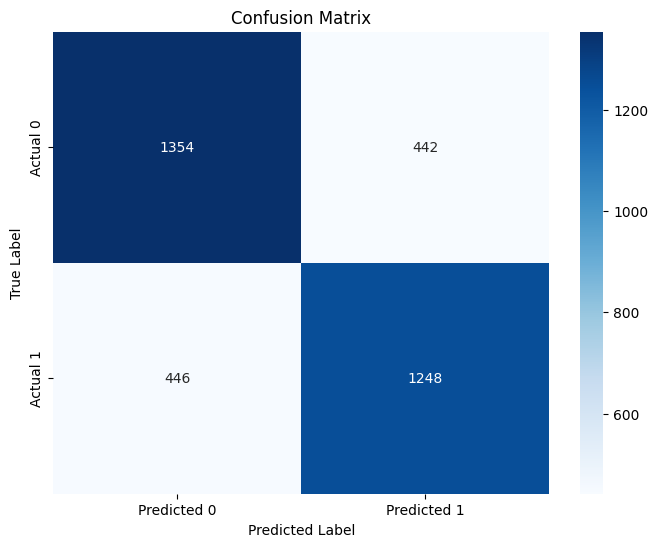

In [15]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Calculate individual metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print all metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7455587392550144
Precision: 0.7384615384615385
Recall: 0.7367178276269185
F1 Score: 0.7375886524822695


## Assess by Ethnicity - Caucasian

In [19]:
feature_names = X.columns
X_test_df = pd.DataFrame(X_test, columns=feature_names)
X_test_df.head()

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,priors_count.1,start,end,event,sex_Female,...,c_charge_degree_(F3),c_charge_degree_(F5),c_charge_degree_(F6),c_charge_degree_(F7),c_charge_degree_(M1),c_charge_degree_(M2),c_charge_degree_(MO3),c_charge_degree_(NI0),c_charge_degree_(TCX),c_charge_degree_(X)
15150,30,0,0,0,2,2,154,494,0,0,...,1,0,0,0,0,0,0,0,0,0
1355,26,0,0,1,3,3,1,895,0,0,...,1,0,0,0,0,0,0,0,0,0
11392,67,0,0,0,5,5,485,506,0,0,...,1,0,0,0,0,0,0,0,0,0
19,20,0,0,1,0,0,497,844,0,0,...,1,0,0,0,0,0,0,0,0,0
7507,22,0,0,2,5,5,775,940,0,0,...,1,0,0,0,0,0,0,0,0,0


In [20]:
X_test_df['y_test'] = y_test.values
X_test_df['y_pred'] = y_pred
X_test_df

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,priors_count.1,start,end,event,sex_Female,...,c_charge_degree_(F6),c_charge_degree_(F7),c_charge_degree_(M1),c_charge_degree_(M2),c_charge_degree_(MO3),c_charge_degree_(NI0),c_charge_degree_(TCX),c_charge_degree_(X),y_test,y_pred
15150,30,0,0,0,2,2,154,494,0,0,...,0,0,0,0,0,0,0,0,1,1
1355,26,0,0,1,3,3,1,895,0,0,...,0,0,0,0,0,0,0,0,1,0
11392,67,0,0,0,5,5,485,506,0,0,...,0,0,0,0,0,0,0,0,0,0
19,20,0,0,1,0,0,497,844,0,0,...,0,0,0,0,0,0,0,0,0,1
7507,22,0,0,2,5,5,775,940,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14406,22,0,0,0,1,1,0,117,0,0,...,0,0,0,0,0,0,0,0,1,1
2188,24,0,0,0,0,0,0,1084,0,0,...,0,0,0,0,0,0,0,0,0,0
5456,35,0,0,0,0,0,135,898,0,0,...,0,0,0,0,0,0,0,0,1,0
3826,20,0,0,0,0,0,1,673,0,1,...,0,0,0,1,0,0,0,0,0,0


In [21]:
caucasian_data = X_test_df[X_test_df['race_Caucasian'] == 1]
caucasian_data

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,priors_count.1,start,end,event,sex_Female,...,c_charge_degree_(F6),c_charge_degree_(F7),c_charge_degree_(M1),c_charge_degree_(M2),c_charge_degree_(MO3),c_charge_degree_(NI0),c_charge_degree_(TCX),c_charge_degree_(X),y_test,y_pred
11392,67,0,0,0,5,5,485,506,0,0,...,0,0,0,0,0,0,0,0,0,0
19,20,0,0,1,0,0,497,844,0,0,...,0,0,0,0,0,0,0,0,0,1
8444,22,0,0,0,2,2,113,345,0,1,...,0,0,1,0,0,0,0,0,1,1
4464,23,0,0,0,1,1,766,767,0,0,...,0,0,0,0,0,0,0,0,0,1
13186,36,0,0,0,5,5,3,878,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16225,20,0,0,0,0,0,450,508,0,1,...,0,0,0,0,0,0,0,0,1,1
79,55,0,0,0,0,0,1,823,0,0,...,0,0,0,0,0,0,0,0,0,0
4963,46,0,0,1,2,2,1016,1048,0,0,...,0,0,1,0,0,0,0,0,1,1
2188,24,0,0,0,0,0,0,1084,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y_test_caucasian = caucasian_data['y_test']

# Extract the predictions for the 'caucasian' subgroup
y_pred_caucasian = caucasian_data['y_pred']

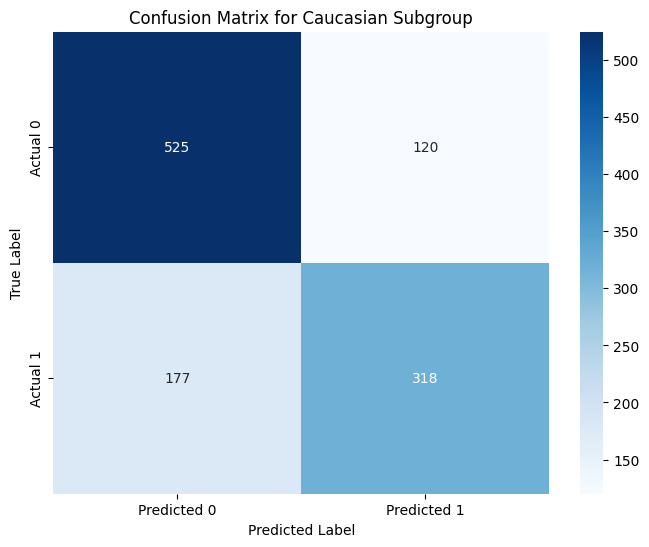

In [24]:
# Generate the confusion matrix for the 'caucasian' subgroup
cm_caucasian = confusion_matrix(y_test_caucasian, y_pred_caucasian)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_caucasian, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Caucasian Subgroup')
plt.show()

## Assess by Ethnicity - African American

In [25]:
african_american_data = X_test_df[X_test_df['race_African-American'] == 1]
african_american_data

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,priors_count.1,start,end,event,sex_Female,...,c_charge_degree_(F6),c_charge_degree_(F7),c_charge_degree_(M1),c_charge_degree_(M2),c_charge_degree_(MO3),c_charge_degree_(NI0),c_charge_degree_(TCX),c_charge_degree_(X),y_test,y_pred
15150,30,0,0,0,2,2,154,494,0,0,...,0,0,0,0,0,0,0,0,1,1
1355,26,0,0,1,3,3,1,895,0,0,...,0,0,0,0,0,0,0,0,1,0
7676,27,0,0,0,3,3,0,373,0,1,...,0,0,0,0,0,0,0,0,0,0
14091,21,0,0,0,1,1,215,400,0,0,...,0,0,0,0,0,0,0,0,1,1
101,34,2,1,3,21,21,915,1176,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10498,51,0,0,0,0,0,1,647,0,0,...,0,0,0,0,0,0,0,0,1,0
12250,35,0,0,0,0,0,276,507,0,0,...,0,0,0,0,0,0,0,0,0,1
14406,22,0,0,0,1,1,0,117,0,0,...,0,0,0,0,0,0,0,0,1,1
3826,20,0,0,0,0,0,1,673,0,1,...,0,0,0,1,0,0,0,0,0,0


In [26]:
y_test_african_american = african_american_data['y_test']

# Extract the predictions for the 'african_american' subgroup
y_pred_african_american = african_american_data['y_pred']

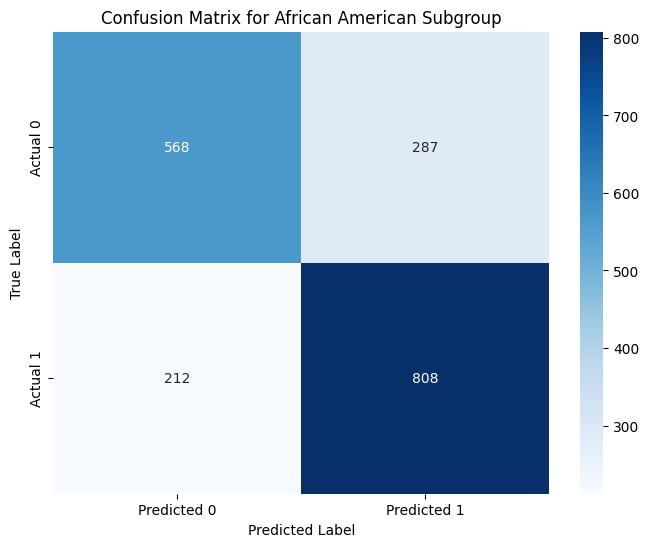

In [27]:
# Generate the confusion matrix for the 'african_american' subgroup
cm_african_american = confusion_matrix(y_test_african_american, y_pred_african_american)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_african_american, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for African American Subgroup')
plt.show()

Comparing the confusion matrix from African Americans from Caucasians, african americans have over DOUBLE the false positives.

## Bias mitigation

In [34]:
df_filtered = df[df['race'].isin(["Caucasian", "African-American"])]

# find the minimum count across groups (race + is_recid)
min_count = df_filtered.groupby(['race', 'is_recid']).size().min()

# undersample each group to that minimum
df_balanced = (
    df_filtered.groupby(['race', 'is_recid'], group_keys=False)
    .apply(lambda x: x.sample(n=min_count, random_state=42))
    .reset_index(drop=True)
)
df_balanced

/var/folders/hx/y8xsfw254qj_h_vj_1f6p8kw0000gn/T/ipykernel_88847/2046538666.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min_count, random_state=42))


,sex,age,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_charge_degree,is_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event
0,Male,37,African-American,0,6,0,0,6,(M1),0,0,6,5,6,0,938,0
1,Female,28,African-American,0,7,0,0,0,(M1),0,0,7,6,0,47,604,0
2,Male,50,African-American,0,9,0,0,9,(F2),0,0,9,7,9,0,990,0
3,Male,25,African-American,0,6,0,0,0,(F2),0,0,6,7,0,551,952,0
4,Male,43,African-American,0,2,0,0,4,(F5),0,0,2,3,4,417,917,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9827,Female,31,Caucasian,0,4,0,0,0,(F3),1,0,4,2,0,205,304,0
9828,Female,56,Caucasian,0,5,0,0,10,(F3),1,0,5,4,10,852,1006,0
9829,Male,38,Caucasian,0,1,0,0,5,(F2),1,0,1,2,5,0,46,0
9830,Male,25,Caucasian,0,2,0,0,1,(M2),1,0,2,3,1,942,984,0


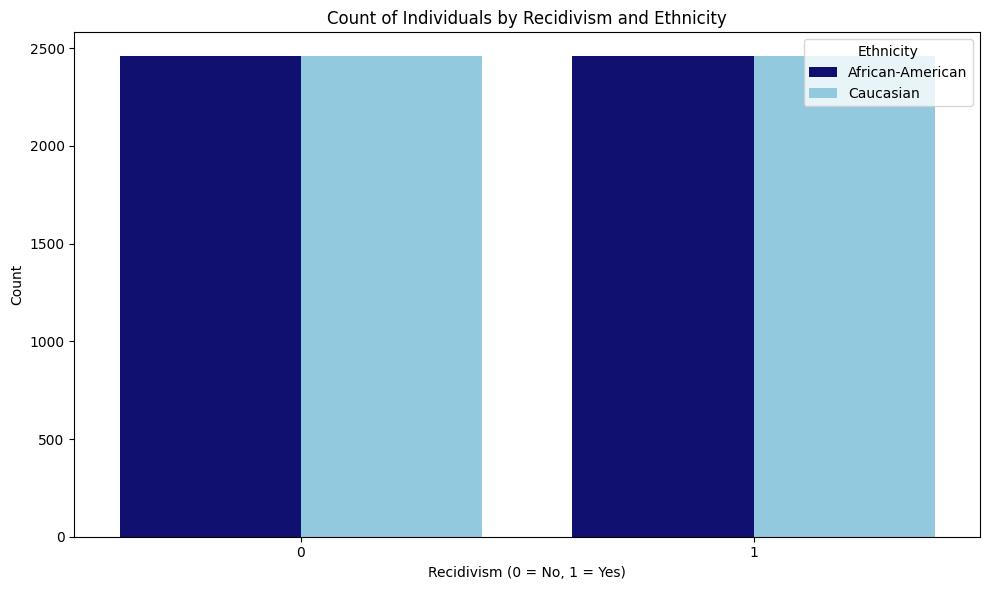

In [35]:
# Filter the DataFrame to include only the specified ethnicities
df_filtered2 = df_balanced[df_balanced['race'].isin(['African-American', 'Caucasian'])].copy()

# Calculate the counts by grouping by is_recid and race
grouped_counts = df_filtered2.groupby(['is_recid', 'race']).size().reset_index(name='count')

# Set a color palette for the plot
colors = {'African-American': 'navy', 'Caucasian': 'skyblue'}

# Create the grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_counts, x='is_recid', y='count', hue='race', palette=colors)

# Set titles and labels for clarity
plt.title('Count of Individuals by Recidivism and Ethnicity')
plt.xlabel('Recidivism (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Add a legend
plt.legend(title='Ethnicity')

# Ensure the plot layout is tight
plt.tight_layout()

In [36]:
df_encoded2 = pd.get_dummies(df_balanced, dtype=int)
df_encoded2

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,is_recid,is_violent_recid,decile_score.1,v_decile_score,...,c_charge_degree_(F2),c_charge_degree_(F3),c_charge_degree_(F5),c_charge_degree_(F6),c_charge_degree_(F7),c_charge_degree_(M1),c_charge_degree_(M2),c_charge_degree_(MO3),c_charge_degree_(NI0),c_charge_degree_(X)
0,37,0,6,0,0,6,0,0,6,5,...,0,0,0,0,0,1,0,0,0,0
1,28,0,7,0,0,0,0,0,7,6,...,0,0,0,0,0,1,0,0,0,0
2,50,0,9,0,0,9,0,0,9,7,...,1,0,0,0,0,0,0,0,0,0
3,25,0,6,0,0,0,0,0,6,7,...,1,0,0,0,0,0,0,0,0,0
4,43,0,2,0,0,4,0,0,2,3,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9827,31,0,4,0,0,0,1,0,4,2,...,0,1,0,0,0,0,0,0,0,0
9828,56,0,5,0,0,10,1,0,5,4,...,0,1,0,0,0,0,0,0,0,0
9829,38,0,1,0,0,5,1,0,1,2,...,1,0,0,0,0,0,0,0,0,0
9830,25,0,2,0,0,1,1,0,2,3,...,0,0,0,0,0,0,1,0,0,0


In [37]:
X = df_encoded2.drop(columns=["decile_score", "is_recid", "is_violent_recid", "decile_score.1", "v_decile_score"])
y = df_encoded2["is_recid"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Create a logistic regression model instance
model2 = LogisticRegression(solver='liblinear', random_state=42)

# Train the model on the training data
model2.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [40]:
y_pred = model2.predict(X_test)

Confusion Matrix:
[[696 272]
 [285 714]]


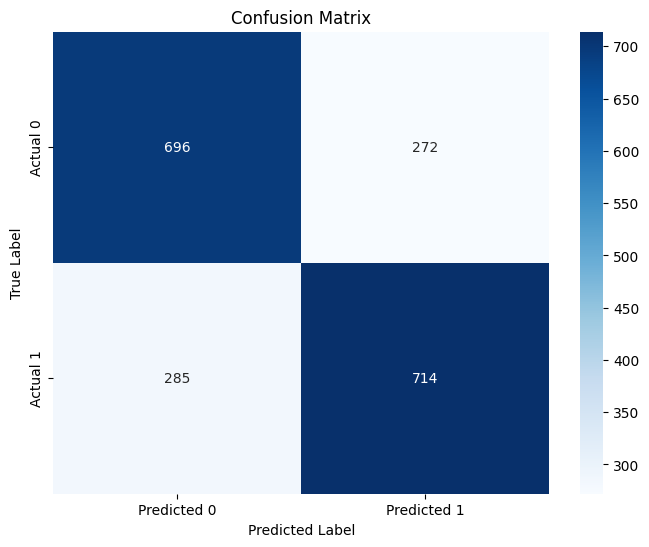

In [41]:

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [42]:
# Calculate individual metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print all metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7168276563294357
Precision: 0.7241379310344828
Recall: 0.7147147147147147
F1 Score: 0.7193954659949622


## Asses by Race - Caucasian

In [43]:
feature_names = X.columns
X_test_df = pd.DataFrame(X_test, columns=feature_names)
X_test_df.head()

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,priors_count.1,start,end,event,sex_Female,...,c_charge_degree_(F2),c_charge_degree_(F3),c_charge_degree_(F5),c_charge_degree_(F6),c_charge_degree_(F7),c_charge_degree_(M1),c_charge_degree_(M2),c_charge_degree_(MO3),c_charge_degree_(NI0),c_charge_degree_(X)
4477,33,0,1,0,6,6,1,500,1,0,...,0,0,0,0,0,0,1,0,0,0
2147,38,0,1,0,10,10,0,506,0,0,...,0,0,0,0,0,1,0,0,0,0
518,29,0,0,0,0,0,0,873,0,0,...,0,0,0,0,0,0,1,0,0,0
7199,24,0,0,0,4,4,36,41,0,0,...,0,1,0,0,0,0,0,0,0,0
1851,28,0,0,0,1,1,0,130,0,0,...,0,1,0,0,0,0,0,0,0,0


In [44]:
X_test_df['y_test'] = y_test.values
X_test_df['y_pred'] = y_pred
X_test_df

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,priors_count.1,start,end,event,sex_Female,...,c_charge_degree_(F5),c_charge_degree_(F6),c_charge_degree_(F7),c_charge_degree_(M1),c_charge_degree_(M2),c_charge_degree_(MO3),c_charge_degree_(NI0),c_charge_degree_(X),y_test,y_pred
4477,33,0,1,0,6,6,1,500,1,0,...,0,0,0,0,1,0,0,0,1,1
2147,38,0,1,0,10,10,0,506,0,0,...,0,0,0,1,0,0,0,0,0,1
518,29,0,0,0,0,0,0,873,0,0,...,0,0,0,0,1,0,0,0,0,0
7199,24,0,0,0,4,4,36,41,0,0,...,0,0,0,0,0,0,0,0,0,1
1851,28,0,0,0,1,1,0,130,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,25,0,0,0,0,0,1,758,0,0,...,0,0,0,0,0,0,0,0,0,0
5649,22,0,0,1,1,1,0,82,0,0,...,0,0,0,0,0,0,0,0,0,1
7265,25,0,0,0,0,0,81,845,0,0,...,0,0,0,0,0,0,0,0,0,0
3110,21,0,0,0,0,0,784,795,0,0,...,0,0,0,0,0,0,0,0,1,1


In [45]:
caucasian_data = X_test_df[X_test_df['race_Caucasian'] == 1]
caucasian_data

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,priors_count.1,start,end,event,sex_Female,...,c_charge_degree_(F5),c_charge_degree_(F6),c_charge_degree_(F7),c_charge_degree_(M1),c_charge_degree_(M2),c_charge_degree_(MO3),c_charge_degree_(NI0),c_charge_degree_(X),y_test,y_pred
7199,24,0,0,0,4,4,36,41,0,0,...,0,0,0,0,0,0,0,0,0,1
6237,36,0,0,0,0,0,0,514,0,0,...,0,0,0,1,0,0,0,0,0,0
7760,39,0,0,0,1,1,9,332,0,1,...,0,0,0,1,0,0,0,0,1,0
5920,30,0,0,0,0,0,0,794,0,0,...,0,0,0,0,0,0,0,0,0,0
5833,43,0,0,0,1,1,0,1162,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,24,0,0,0,1,1,0,394,1,1,...,0,0,0,1,0,0,0,0,1,1
8758,33,0,0,0,3,3,0,303,0,0,...,0,0,0,0,0,0,0,0,1,1
5278,31,0,0,0,6,6,949,950,0,0,...,0,0,0,1,0,0,0,0,0,1
5649,22,0,0,1,1,1,0,82,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
y_test_caucasian = caucasian_data['y_test']

# Extract the predictions for the 'caucasian' subgroup
y_pred_caucasian = caucasian_data['y_pred']

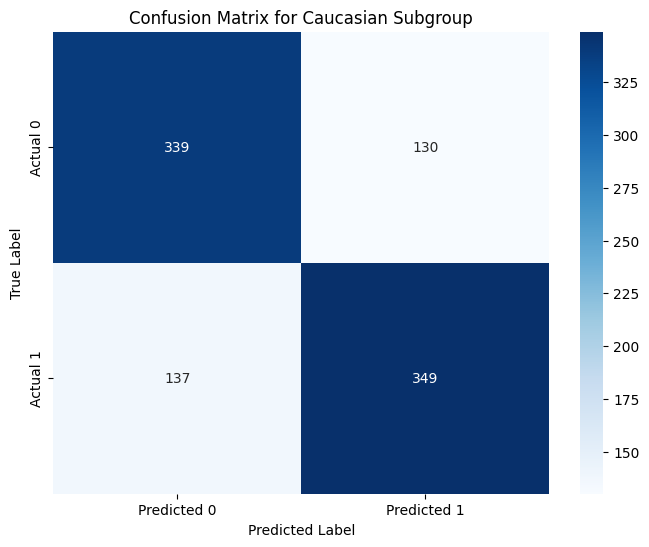

In [47]:
# Generate the confusion matrix for the 'caucasian' subgroup
cm_caucasian = confusion_matrix(y_test_caucasian, y_pred_caucasian)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_caucasian, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Caucasian Subgroup')
plt.show()

## Asses by Ethnicity

In [48]:
african_american_data = X_test_df[X_test_df['race_African-American'] == 1]
african_american_data

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,priors_count.1,start,end,event,sex_Female,...,c_charge_degree_(F5),c_charge_degree_(F6),c_charge_degree_(F7),c_charge_degree_(M1),c_charge_degree_(M2),c_charge_degree_(MO3),c_charge_degree_(NI0),c_charge_degree_(X),y_test,y_pred
4477,33,0,1,0,6,6,1,500,1,0,...,0,0,0,0,1,0,0,0,1,1
2147,38,0,1,0,10,10,0,506,0,0,...,0,0,0,1,0,0,0,0,0,1
518,29,0,0,0,0,0,0,873,0,0,...,0,0,0,0,1,0,0,0,0,0
1851,28,0,0,0,1,1,0,130,0,0,...,0,0,0,0,0,0,0,0,0,1
2210,34,0,0,0,6,6,51,803,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,22,0,1,0,8,8,170,177,1,0,...,0,0,0,0,0,0,0,0,1,1
625,23,0,0,0,0,0,1,790,0,0,...,0,0,0,0,0,0,0,0,0,0
1922,25,0,0,0,0,0,1,758,0,0,...,0,0,0,0,0,0,0,0,0,0
3110,21,0,0,0,0,0,784,795,0,0,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
y_test_african_american = african_american_data['y_test']

# Extract the predictions for the 'african_american' subgroup
y_pred_african_american = african_american_data['y_pred']

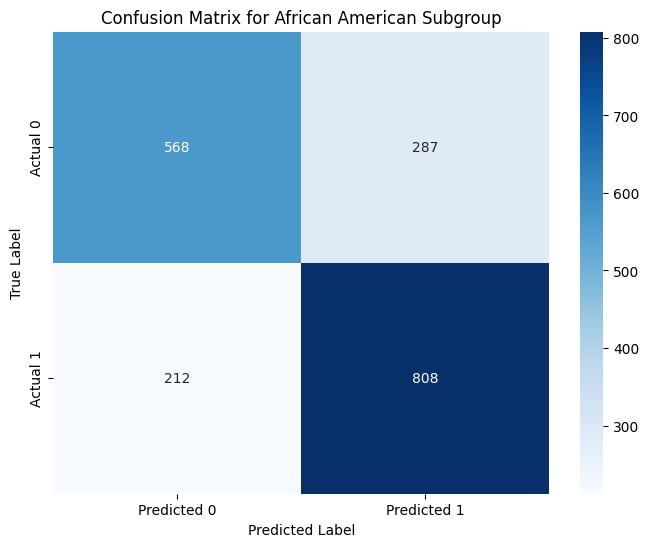

In [49]:
# Generate the confusion matrix for the 'african_american' subgroup
cm_african_american = confusion_matrix(y_test_african_american, y_pred_african_american)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_african_american, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for African American Subgroup')
plt.show()

Balancing the classes didn't help much, let's do some post processing

## Bias mitigation post process

In [50]:
# probabilities for both classes
probs = model2.predict_proba(X_test)

# take only the probability of class 1
probs_class1 = probs[:, 1]

In [69]:
threshold = 0.65
y_pred_custom = (probs_class1 >= threshold).astype(int)

In [70]:
feature_names = X.columns
X_test_df = pd.DataFrame(X_test, columns=feature_names)
X_test_df.head()

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,priors_count.1,start,end,event,sex_Female,...,c_charge_degree_(F2),c_charge_degree_(F3),c_charge_degree_(F5),c_charge_degree_(F6),c_charge_degree_(F7),c_charge_degree_(M1),c_charge_degree_(M2),c_charge_degree_(MO3),c_charge_degree_(NI0),c_charge_degree_(X)
4477,33,0,1,0,6,6,1,500,1,0,...,0,0,0,0,0,0,1,0,0,0
2147,38,0,1,0,10,10,0,506,0,0,...,0,0,0,0,0,1,0,0,0,0
518,29,0,0,0,0,0,0,873,0,0,...,0,0,0,0,0,0,1,0,0,0
7199,24,0,0,0,4,4,36,41,0,0,...,0,1,0,0,0,0,0,0,0,0
1851,28,0,0,0,1,1,0,130,0,0,...,0,1,0,0,0,0,0,0,0,0


In [71]:
X_test_df['y_test'] = y_test.values
X_test_df['y_pred_custom'] = y_pred_custom
X_test_df

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,priors_count.1,start,end,event,sex_Female,...,c_charge_degree_(F5),c_charge_degree_(F6),c_charge_degree_(F7),c_charge_degree_(M1),c_charge_degree_(M2),c_charge_degree_(MO3),c_charge_degree_(NI0),c_charge_degree_(X),y_test,y_pred_custom
4477,33,0,1,0,6,6,1,500,1,0,...,0,0,0,0,1,0,0,0,1,1
2147,38,0,1,0,10,10,0,506,0,0,...,0,0,0,1,0,0,0,0,0,0
518,29,0,0,0,0,0,0,873,0,0,...,0,0,0,0,1,0,0,0,0,0
7199,24,0,0,0,4,4,36,41,0,0,...,0,0,0,0,0,0,0,0,0,1
1851,28,0,0,0,1,1,0,130,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,25,0,0,0,0,0,1,758,0,0,...,0,0,0,0,0,0,0,0,0,0
5649,22,0,0,1,1,1,0,82,0,0,...,0,0,0,0,0,0,0,0,0,1
7265,25,0,0,0,0,0,81,845,0,0,...,0,0,0,0,0,0,0,0,0,0
3110,21,0,0,0,0,0,784,795,0,0,...,0,0,0,0,0,0,0,0,1,0


In [72]:
caucasian_data = X_test_df[X_test_df['race_Caucasian'] == 1]
caucasian_data

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,priors_count.1,start,end,event,sex_Female,...,c_charge_degree_(F5),c_charge_degree_(F6),c_charge_degree_(F7),c_charge_degree_(M1),c_charge_degree_(M2),c_charge_degree_(MO3),c_charge_degree_(NI0),c_charge_degree_(X),y_test,y_pred_custom
7199,24,0,0,0,4,4,36,41,0,0,...,0,0,0,0,0,0,0,0,0,1
6237,36,0,0,0,0,0,0,514,0,0,...,0,0,0,1,0,0,0,0,0,0
7760,39,0,0,0,1,1,9,332,0,1,...,0,0,0,1,0,0,0,0,1,0
5920,30,0,0,0,0,0,0,794,0,0,...,0,0,0,0,0,0,0,0,0,0
5833,43,0,0,0,1,1,0,1162,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,24,0,0,0,1,1,0,394,1,1,...,0,0,0,1,0,0,0,0,1,1
8758,33,0,0,0,3,3,0,303,0,0,...,0,0,0,0,0,0,0,0,1,0
5278,31,0,0,0,6,6,949,950,0,0,...,0,0,0,1,0,0,0,0,0,1
5649,22,0,0,1,1,1,0,82,0,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
y_test_caucasian = caucasian_data['y_test']

# Extract the predictions for the 'caucasian' subgroup
y_pred_caucasian = caucasian_data['y_pred_custom']

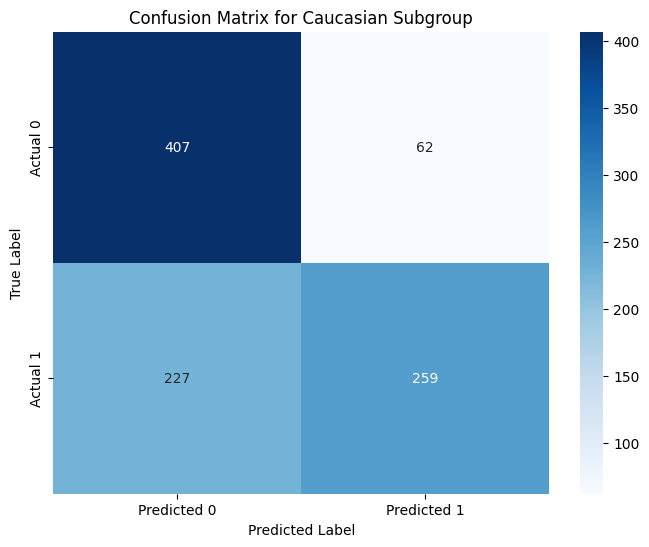

In [74]:
# Generate the confusion matrix for the 'caucasian' subgroup
cm_caucasian = confusion_matrix(y_test_caucasian, y_pred_caucasian)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_caucasian, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Caucasian Subgroup')
plt.show()

In [75]:
african_american_data = X_test_df[X_test_df['race_African-American'] == 1]
african_american_data

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,priors_count.1,start,end,event,sex_Female,...,c_charge_degree_(F5),c_charge_degree_(F6),c_charge_degree_(F7),c_charge_degree_(M1),c_charge_degree_(M2),c_charge_degree_(MO3),c_charge_degree_(NI0),c_charge_degree_(X),y_test,y_pred_custom
4477,33,0,1,0,6,6,1,500,1,0,...,0,0,0,0,1,0,0,0,1,1
2147,38,0,1,0,10,10,0,506,0,0,...,0,0,0,1,0,0,0,0,0,0
518,29,0,0,0,0,0,0,873,0,0,...,0,0,0,0,1,0,0,0,0,0
1851,28,0,0,0,1,1,0,130,0,0,...,0,0,0,0,0,0,0,0,0,0
2210,34,0,0,0,6,6,51,803,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,22,0,1,0,8,8,170,177,1,0,...,0,0,0,0,0,0,0,0,1,1
625,23,0,0,0,0,0,1,790,0,0,...,0,0,0,0,0,0,0,0,0,0
1922,25,0,0,0,0,0,1,758,0,0,...,0,0,0,0,0,0,0,0,0,0
3110,21,0,0,0,0,0,784,795,0,0,...,0,0,0,0,0,0,0,0,1,0


In [76]:
y_test_african_american = african_american_data['y_test']

# Extract the predictions for the 'african_american' subgroup
y_pred_african_american = african_american_data['y_pred_custom']

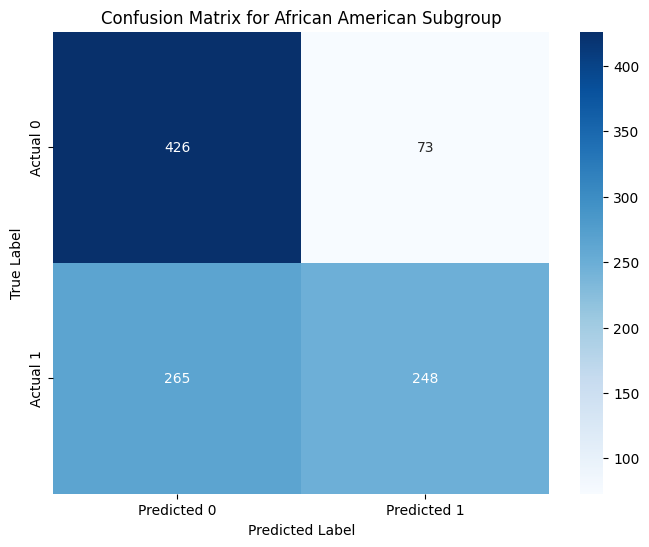

In [77]:
# Generate the confusion matrix for the 'african_american' subgroup
cm_african_american = confusion_matrix(y_test_african_american, y_pred_african_american)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_african_american, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for African American Subgroup')
plt.show()

Custom treshold leads to less accuracy but more fairness